In [1]:
# !pip install deep-translator
# !pip install geojson

In [1]:
# Initial imports
import pandas as pd
import geojson
import numpy as np
from deep_translator import GoogleTranslator

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV
sales_df = pd.read_csv('Resources/sale_clean.csv')
sales_df.head()

,regione,citta,quartiere,prezzo,datetime,posti auto,bagni per stanza,bagni,stanze,ultimo piano,...,giardino privato,impianto allarme,portiere,piscina,villa,intera proprieta,appartamento,attico,loft,mansarda
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,1,1,0,0,1,0,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,1,0,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,1,0,0,0,1,0,0,0,0,0


In [3]:
# Translate columns to english
def Translate(italian_input):
    return GoogleTranslator(source='it', target='en').translate(italian_input)

columns_translated = [Translate(c) for c in sales_df.columns]
columns_translated[-1] = "attic2"

columns_translated = [c.replace(" ", "_") for c in columns_translated]
sales_df.columns = columns_translated
sales_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,...,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts,attic2
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,1,0,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,1,1,0,0,1,0,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,1,0,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,1,0,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,1,0,0,0,1,0,0,0,0,0


In [4]:
# Checking data types
sales_df.dtypes

region                  object
city                    object
quarter                 object
price                  float64
datetime                object
parking_spaces           int64
bathrooms_per_room     float64
bathrooms              float64
rooms                  float64
top_floor                int64
state                   object
energy_rating           object
sea_​​View             float64
centralized_warming    float64
surface                float64
furnished                int64
balcony                  int64
TV_system                int64
external_exposure        int64
optic_fiber              int64
electric_gate            int64
cellar                   int64
common_garden            int64
private_garden           int64
alarm_system             int64
doorman                  int64
pool                     int64
villa                    int64
entire_property          int64
apartment                int64
attic                    int64
lofts                    int64
attic2  

In [5]:
# Change data type to datetime 
sales_df['datetime'] = pd.to_datetime(sales_df['datetime'])

In [6]:
# Checking data types 
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087 entries, 0 to 37086
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   region               37087 non-null  object        
 1   city                 37087 non-null  object        
 2   quarter              35154 non-null  object        
 3   price                35534 non-null  float64       
 4   datetime             37087 non-null  datetime64[ns]
 5   parking_spaces       37087 non-null  int64         
 6   bathrooms_per_room   29155 non-null  float64       
 7   bathrooms            36480 non-null  float64       
 8   rooms                29399 non-null  float64       
 9   top_floor            37087 non-null  int64         
 10  state                8013 non-null   object        
 11  energy_rating        6131 non-null   object        
 12  sea_​​View           37082 non-null  float64       
 13  centralized_warming  6336 non-n

In [7]:
# Renaming columns
sales_df = sales_df.rename(columns = {'sea_​​View': 'sea_view', 'rooms':'bedrooms'})
sales_df.columns

Index(['region', 'city', 'quarter', 'price', 'datetime', 'parking_spaces',
       'bathrooms_per_room', 'bathrooms', 'bedrooms', 'top_floor', 'state',
       'energy_rating', 'sea_view', 'centralized_warming', 'surface',
       'furnished', 'balcony', 'TV_system', 'external_exposure', 'optic_fiber',
       'electric_gate', 'cellar', 'common_garden', 'private_garden',
       'alarm_system', 'doorman', 'pool', 'villa', 'entire_property',
       'apartment', 'attic', 'lofts', 'attic2'],
      dtype='object')

In [8]:
# Dropping column
sales_df = sales_df.drop(columns=['attic2'])
sales_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [9]:
# Check the number of uniques in each column
sales_df.nunique()

region                   21
city                   2324
quarter                8021
price                  2787
datetime                587
parking_spaces            2
bathrooms_per_room       28
bathrooms                 9
bedrooms                  5
top_floor                 2
state                     4
energy_rating             8
sea_view                  2
centralized_warming       2
surface                 292
furnished                 2
balcony                   2
TV_system                 2
external_exposure         2
optic_fiber               2
electric_gate             2
cellar                    2
common_garden             2
private_garden            2
alarm_system              1
doorman                   2
pool                      2
villa                     2
entire_property           1
apartment                 2
attic                     2
lofts                     2
dtype: int64

In [10]:
# Checking the number of nulls in bedrooms and bathrooms
sales_df[['bedrooms', 'bathrooms', 'price']].isnull().sum()

bedrooms     7688
bathrooms     607
price        1553
dtype: int64

In [11]:
# Dropping nulls
sales_df.dropna(subset=['price', 'bedrooms', 'bathrooms'], inplace=True)
sales_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
# Look for all rows with price at the range of 1000 to 10000000
filter_values = (sales_df['price'] >= 1000) & (sales_df['price'] <= 10000000)

# Apply the filter_values to filter the DataFrame
filtered_df = sales_df[filter_values]
filtered_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [13]:
# Checking the number of nulls in each column
filtered_df.isnull().sum()

region                     0
city                       0
quarter                  950
price                      0
datetime                   0
parking_spaces             0
bathrooms_per_room         0
bathrooms                  0
bedrooms                   0
top_floor                  0
state                  19925
energy_rating          20471
sea_view                   0
centralized_warming    20741
surface                 2728
furnished                  0
balcony                    0
TV_system                  0
external_exposure          0
optic_fiber                0
electric_gate              0
cellar                     0
common_garden              0
private_garden             0
alarm_system               0
doorman                    0
pool                       0
villa                      0
entire_property            0
apartment                  0
attic                      0
lofts                      0
dtype: int64

In [14]:
# Replace nulls in surface column with the average of surface
surface_average = round(filtered_df['surface'].mean() , 0)
filtered_df['surface'].fillna(surface_average, inplace=True)
filtered_df.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0


In [15]:
# Check for duplicates and resetting index
filtered_df.reset_index(drop=True, inplace=True)
duplicates = filtered_df[filtered_df.duplicated()]
duplicates.head()

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
206,lombardia,Milano,Isola,1100.0,2023-05-18,0,0.500000,1.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0
230,lombardia,Milano,Dergano,1250.0,2023-05-18,0,0.666667,2.0,3.0,0,...,0,0,0,0,0,0,0,1,0,0
262,lombardia,Melzo,Via Giuseppe Costa,1000.0,2023-05-18,1,0.250000,1.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
269,lombardia,Milano,Centrale,2700.0,2023-05-18,0,0.250000,1.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
294,lombardia,Milano,Garibaldi - Corso Como,1500.0,2023-05-18,0,0.500000,1.0,2.0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Capitalize the first letter of each data in the region column
filtered_df['region'] = filtered_df['region'].str.capitalize()
filtered_df

,region,city,quarter,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,...,common_garden,private_garden,alarm_system,doorman,pool,villa,entire_property,apartment,attic,lofts
0,Sardegna,Valledoria,Via Alessandro Volta,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,...,1,0,0,0,0,0,0,1,0,0
1,Sardegna,San Teodoro,NaN,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,...,0,0,0,1,1,0,0,1,0,0
2,Sardegna,Cagliari,Fiera - Monte Mixi,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
3,Sardegna,Cagliari,Piazza Giovanni XXIII,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,...,0,0,0,0,0,0,0,1,0,0
4,Sardegna,Budoni,Località Baia Sant'Anna,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22286,Toscana,Firenze,Castello,285000.0,2023-06-22,1,0.250000,1.0,4.0,0,...,0,0,0,0,0,0,0,1,0,0
22287,Toscana,Pontassieve,NaN,358000.0,2023-06-28,1,0.600000,3.0,5.0,0,...,0,1,0,0,0,1,0,0,0,0
22288,Toscana,Firenze,Piazza della Repubblica,580000.0,2023-08-07,0,0.500000,2.0,4.0,1,...,0,0,0,0,0,0,0,1,0,0
22289,Toscana,Marciana,NaN,240000.0,2023-05-18,1,0.333333,1.0,3.0,0,...,0,0,0,0,0,0,0,1,0,0


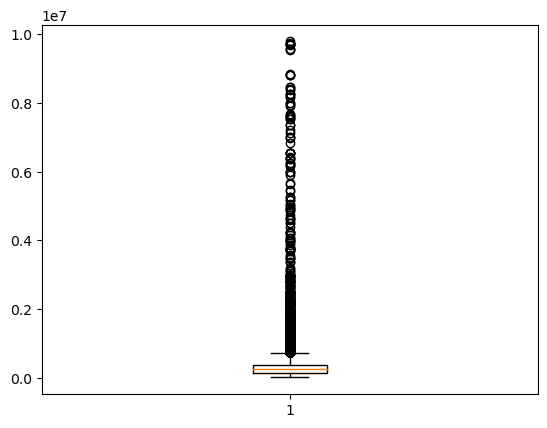

In [17]:
# Initial boxplot
import matplotlib.pyplot as plt

price = filtered_df['price']
plt.boxplot(price)
plt.savefig('Images/boxplot.png')
plt.show()

In [18]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of housing is: {lowerq}")
print(f"The upper quartile of housing is: {upperq}")
print(f"The interquartile range of housing is: {iqr}")
print(f"The median of housing is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of housing is: 132000.0
The upper quartile of housing is: 370000.0
The interquartile range of housing is: 238000.0
The median of housing is: 235000.0 
Values below -225000.0 could be outliers.
Values above 727000.0 could be outliers.


In [21]:
# Save csv file
# filtered_df.to_csv('Output/cap_sales.csv', index=False)

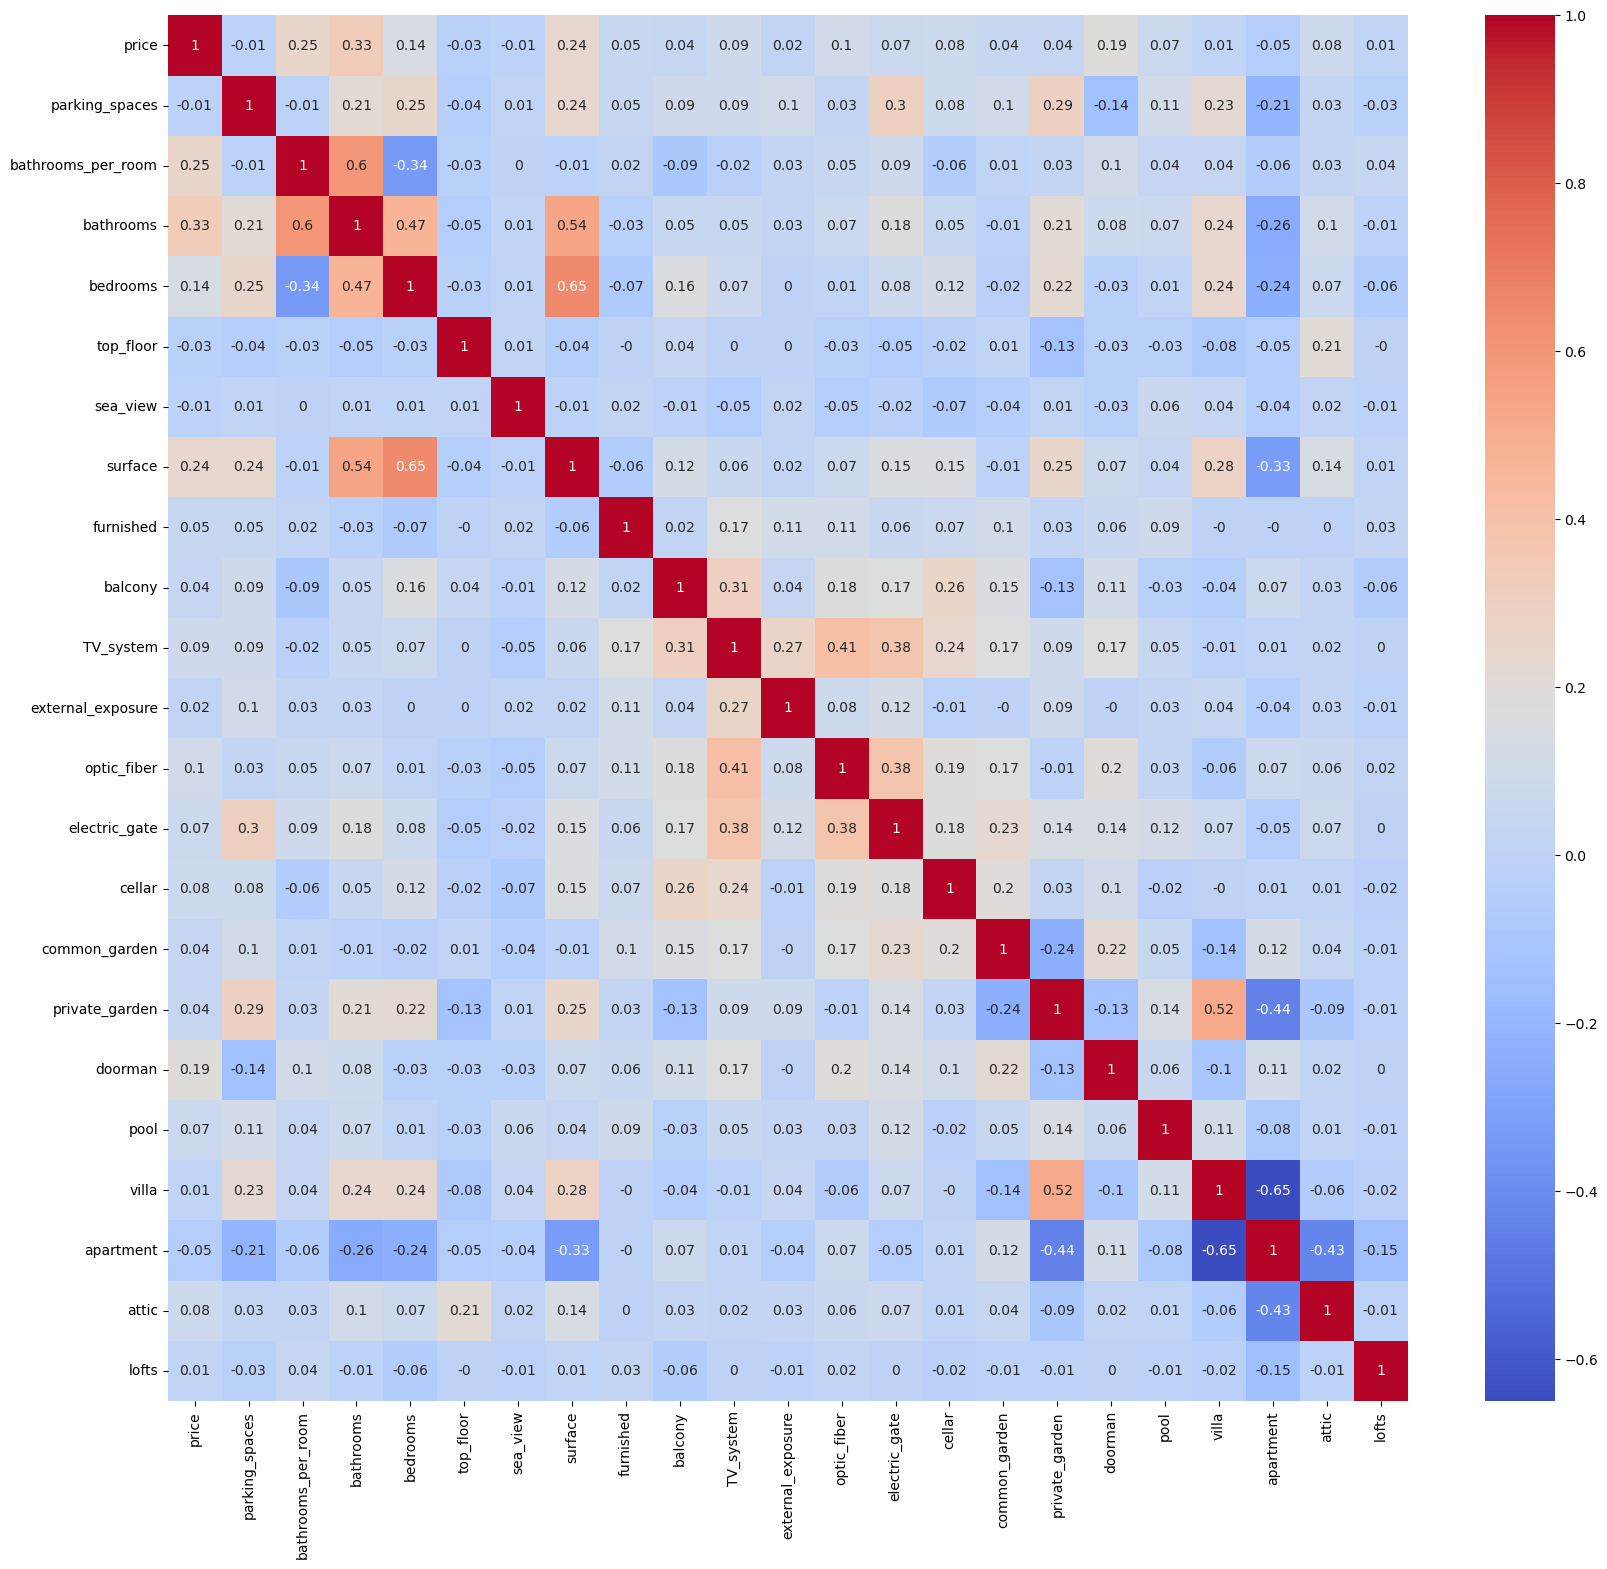

In [20]:
# Creating a heatmap
import seaborn as sns

copy_df = filtered_df.copy() 
copy_df = copy_df.drop(columns=['quarter', 'state', 'energy_rating', 'centralized_warming', 'alarm_system', 'entire_property'])
corr_matrix = copy_df.corr().round(2) 
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#Saving the figure
plt.savefig('Images/heatmap.png')
plt.show()

In [21]:
# Check the value counts of each unique string in region
count = copy_df['region'].value_counts()
count

Lombardia                3769
Emilia-romagna           3216
Piemonte                 2972
Toscana                  2799
Veneto                   2631
Lazio                    1990
Campania                 1595
Sicilia                  1428
Calabria                  691
Sardegna                  234
Trentino-alto-adige       129
Valle-d-aosta             124
Friuli-venezia-giulia     121
Basilicata                119
Liguria                   110
Marche                     96
Molise                     94
Puglia                     90
Abruzzo                    55
Umbria                     28
Name: region, dtype: int64

In [22]:
count[count>1000]

Lombardia         3769
Emilia-romagna    3216
Piemonte          2972
Toscana           2799
Veneto            2631
Lazio             1990
Campania          1595
Sicilia           1428
Name: region, dtype: int64

In [23]:
# Choose a cutoff value and create a list of application types to be replaced
region_to_replace = list(count[count<1000].index)
# Replace in dataframe
for city in region_to_replace:
    copy_df['region'] = copy_df['region'].replace(city,"Other")

# Check to make sure binning was successful
copy_df['region'].value_counts()

Lombardia         3769
Emilia-romagna    3216
Piemonte          2972
Toscana           2799
Veneto            2631
Lazio             1990
Other             1891
Campania          1595
Sicilia           1428
Name: region, dtype: int64

In [24]:
copy_df.head()

,region,city,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,sea_view,...,electric_gate,cellar,common_garden,private_garden,doorman,pool,villa,apartment,attic,lofts
0,Other,Valledoria,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,0.0,...,1,0,1,0,0,0,0,1,0,0
1,Other,San Teodoro,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,0.0,...,0,0,0,0,1,1,0,1,0,0
2,Other,Cagliari,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,Other,Cagliari,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,Other,Budoni,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,0.0,...,0,0,0,1,0,0,1,0,0,0


In [25]:
# Filter out the outliers value
outliers_df = copy_df[copy_df['price'] <= 727000]
outliers_df.head()

,region,city,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,sea_view,...,electric_gate,cellar,common_garden,private_garden,doorman,pool,villa,apartment,attic,lofts
0,Other,Valledoria,78000.0,2022-12-17,0,0.333333,1.0,3.0,0,0.0,...,1,0,1,0,0,0,0,1,0,0
1,Other,San Teodoro,460000.0,2023-03-31,1,0.666667,2.0,3.0,1,0.0,...,0,0,0,0,1,1,0,1,0,0
2,Other,Cagliari,387000.0,2023-04-18,0,0.500000,2.0,4.0,0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,Other,Cagliari,257000.0,2023-04-14,0,0.400000,2.0,5.0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,Other,Budoni,370000.0,2023-03-31,1,0.666667,2.0,3.0,0,0.0,...,0,0,0,1,0,0,1,0,0,0


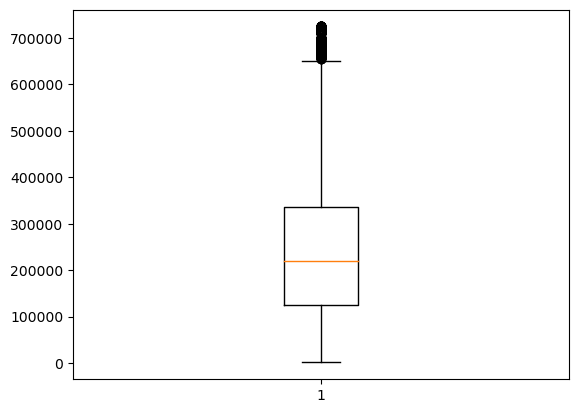

In [26]:
#Second boxplot 
price = outliers_df['price']
plt.boxplot(price)
plt.savefig('Images/boxplot_remove_outliers.png')
plt.show()

In [27]:
# Import relevant metrics from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Split the data into X (features) and y (target)
X = outliers_df.drop(columns=['price', 'datetime', 'city'])
y = outliers_df['price']

In [31]:
# Convert categorical data to numeric with `pd.get_dummies`
X = pd.get_dummies(X)

In [32]:
X.head()

,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,sea_view,surface,furnished,balcony,TV_system,...,lofts,region_Campania,region_Emilia-romagna,region_Lazio,region_Lombardia,region_Other,region_Piemonte,region_Sicilia,region_Toscana,region_Veneto
0,0,0.333333,1.0,3.0,0,0.0,67.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0.666667,2.0,3.0,1,0.0,75.0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0.500000,2.0,4.0,0,0.0,160.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.400000,2.0,5.0,0,0.0,136.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0.666667,2.0,3.0,0,0.0,105.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# Check X columns
X.columns

Index(['parking_spaces', 'bathrooms_per_room', 'bathrooms', 'bedrooms',
       'top_floor', 'sea_view', 'surface', 'furnished', 'balcony', 'TV_system',
       'external_exposure', 'optic_fiber', 'electric_gate', 'cellar',
       'common_garden', 'private_garden', 'doorman', 'pool', 'villa',
       'apartment', 'attic', 'lofts', 'region_Campania',
       'region_Emilia-romagna', 'region_Lazio', 'region_Lombardia',
       'region_Other', 'region_Piemonte', 'region_Sicilia', 'region_Toscana',
       'region_Veneto'],
      dtype='object')

In [34]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Create a model with scikit-learn
model = LinearRegression()
# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions using the X test set
y_pred = model.predict(X_test)

In [38]:
# Calculate the R-squared score of the model on the test data
r2 = r2_score(y_test, y_pred)
r2

0.4282115967586352

In [39]:
# Import relevant metrics from scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Split the data into X (features) and y (target)
X = outliers_df.drop(columns=['price', 'datetime', 'city'])
y = outliers_df['price']

In [40]:
# Convert categorical data to numeric with `pd.get_dummies`
X = pd.get_dummies(X)

In [41]:
# Check X columns
X.columns

Index(['parking_spaces', 'bathrooms_per_room', 'bathrooms', 'bedrooms',
       'top_floor', 'sea_view', 'surface', 'furnished', 'balcony', 'TV_system',
       'external_exposure', 'optic_fiber', 'electric_gate', 'cellar',
       'common_garden', 'private_garden', 'doorman', 'pool', 'villa',
       'apartment', 'attic', 'lofts', 'region_Campania',
       'region_Emilia-romagna', 'region_Lazio', 'region_Lombardia',
       'region_Other', 'region_Piemonte', 'region_Sicilia', 'region_Toscana',
       'region_Veneto'],
      dtype='object')

In [42]:
X.head()

,parking_spaces,bathrooms_per_room,bathrooms,bedrooms,top_floor,sea_view,surface,furnished,balcony,TV_system,...,lofts,region_Campania,region_Emilia-romagna,region_Lazio,region_Lombardia,region_Other,region_Piemonte,region_Sicilia,region_Toscana,region_Veneto
0,0,0.333333,1.0,3.0,0,0.0,67.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0.666667,2.0,3.0,1,0.0,75.0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0.500000,2.0,4.0,0,0.0,160.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.400000,2.0,5.0,0,0.0,136.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0.666667,2.0,3.0,0,0.0,105.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [43]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [44]:
# Define a grid of hyperparameters to search over
grid = {'max_depth': [10, 20, 30], 'min_samples_leaf': [10, 30], 'max_features': ['sqrt', 'auto'], 'n_estimators': [500, 1000]}
# Create a Random Forest Regressor instance with a fixed random seed for reproducibility
r_random = RandomForestRegressor(random_state=42)
# Create a GridSearchCV object that will search over the specified hyperparameter grid
grid_search = GridSearchCV(estimator=r_random, param_grid=grid)
# Fit the GridSearchCV object to the training data to find the best combination of hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [10, 30],
                         'n_estimators': [500, 1000]})

In [45]:
# Lookup best parameter
grid_search.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'n_estimators': 1000}

In [46]:
# Calculate the R-squared score of the model on the test data
grid_search.score(X_test, y_test)

0.6203829484591052

In [47]:
predict = grid_search.predict(X_test)
r2 = r2_score(y_test, predict)
r2

0.6203829484591052

In [48]:
# Calculate the R-squared score of the model on the train data
predict = grid_search.predict(X_train)
r2 = r2_score(y_train, predict)
r2

0.7088431678523102

In [51]:
# Calculate the mean squared error of the model on the train data
predict = grid_search.predict(X_test)
mse = mean_squared_error(y_test, predict)
mse

10489176541.772175

In [52]:
# Random Forests in sklearn will automatically calculate feature importance
importances = grid_search.best_estimator_.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(grid_search.best_estimator_.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.21233282196852948, 'bathrooms'),
 (0.146699923764871, 'TV_system'),
 (0.1237677531802613, 'surface'),
 (0.05775682664585455, 'region_Lombardia'),
 (0.05271316336422777, 'cellar'),
 (0.05147728923534454, 'doorman'),
 (0.04727516682980375, 'balcony'),
 (0.03721791495380639, 'region_Sicilia'),
 (0.034772390275025586, 'private_garden'),
 (0.025298803197876793, 'region_Veneto')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

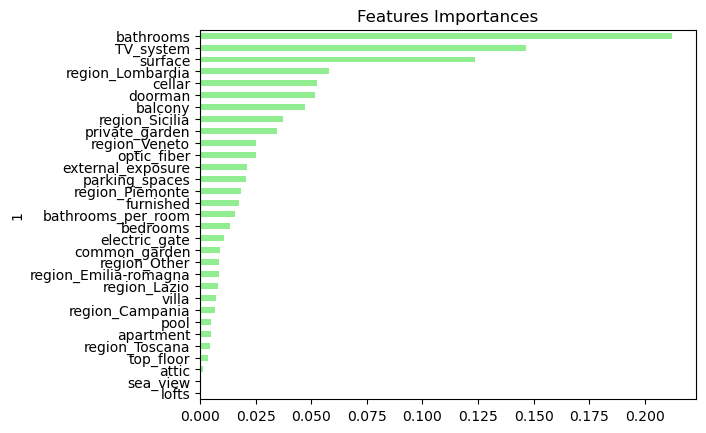

In [53]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(grid_search.best_estimator_.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [54]:
# Import relevant metrics from scikit-learn
from sklearn.model_selection import RandomizedSearchCV
# Split the data into X (features) and y (target)
X = outliers_df.drop(columns=['price', 'datetime', 'city'])
y = outliers_df['price']

In [55]:
# Convert categorical data to numeric with `pd.get_dummies`
X = pd.get_dummies(X)

In [56]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [57]:
# Define a search space for hyperparameters using dictionaries and arrays
rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(100, 1500, step=50),
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': np.arange(1, 20, step=1),
    'min_samples_split': np.arange(2, 10, step=1)
}

In [58]:
# Create a Random Forest Regressor instance with a fixed random seed for reproducibility
rf_model = RandomForestRegressor(random_state=42)
# Create a RandomizedSearchCV object that will search over the specified hyperparameter space
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rs_space, n_iter=500, cv=5, n_jobs=-1, random_state=42)
# Fit the RandomizedSearchCV object to the training data to find the best combination of hyperparameters
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100, 1150,
       1200, 1250, 1300, 1350, 1400, 1450])},
                   random_state=42)

In [59]:
# Lookup best parameter
random_search.best_params_

{'n_estimators': 1400,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80}

In [60]:
# Calculate the R-squared score of the model on the test data
random_search.score(X_test, y_test)

0.7521744521725358

In [61]:
# Calculate the R-squared score of the model on the train data
random_search.score(X_train, y_train)

0.9384551343698927

In [62]:
# Random Forests in sklearn will automatically calculate feature importance
importances = random_search.best_estimator_.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(random_search.best_estimator_.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.18727545682562366, 'surface'),
 (0.08025215948277258, 'bathrooms'),
 (0.07418224140646323, 'TV_system'),
 (0.057410537200710876, 'doorman'),
 (0.050045780424289484, 'bedrooms'),
 (0.04688775997838287, 'bathrooms_per_room'),
 (0.04591279674611494, 'optic_fiber'),
 (0.04093173329440483, 'cellar'),
 (0.03856763446555265, 'balcony'),
 (0.0349280267609768, 'region_Lombardia')]

In [63]:
# Calculate the mean squared error of the model on the test data
best_model = random_search.best_estimator_
prediction = best_model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
mse

6847653213.07924

In [28]:
# Import relevant metrics from scikit-learn
X = outliers_df.drop(columns=['price', 'datetime', 'city'])
# Split the data into X (features) and y (target)
y = outliers_df['price']

In [29]:
# Convert categorical data to numeric with `pd.get_dummies`
X = pd.get_dummies(X)

In [30]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [32]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor instance with specified hyperparameters for the final model.
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=30, random_state=42, min_samples_leaf=10, max_features='auto')
# Fit the Random Forest Regressor model to the training data.
rf_model = rf_model.fit(X_train, y_train)

In [33]:
# Calculate the R-squared score of the model on the test data
rf_model.score(X_test, y_test)

0.6203829484591052

In [34]:
# Calculate the R-squared score of the model on the train data
rf_model.score(X_train, y_train)

0.7088431678523102

In [35]:
# Calculate the mean squared error of the model on the test data
prediction = rf_model.predict(X_test)
mse = mean_squared_error(y_test, prediction)
mse

10489176541.772175

In [36]:
# new_data = pd.DataFrame({'bedrooms': [3], 'bathrooms': [2], 'surface': [150]})
# predicted_price = model.predict(new_data)
# print(f"Predicted Price: {predicted_price[0]}")

In [37]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.21233282196852948, 'bathrooms'),
 (0.146699923764871, 'TV_system'),
 (0.1237677531802613, 'surface'),
 (0.05775682664585455, 'region_Lombardia'),
 (0.05271316336422777, 'cellar'),
 (0.05147728923534454, 'doorman'),
 (0.04727516682980375, 'balcony'),
 (0.03721791495380639, 'region_Sicilia'),
 (0.034772390275025586, 'private_garden'),
 (0.025298803197876793, 'region_Veneto')]

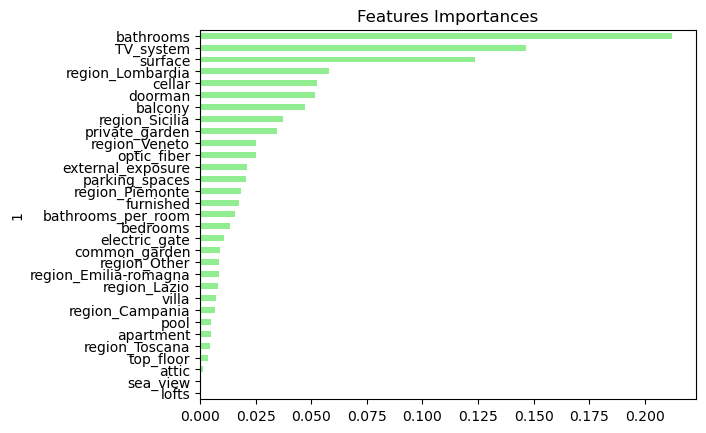

In [38]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
plt.savefig('Images/feature_importances.png', bbox_inches='tight')
plt.show()

In [39]:
# Define feature values for prediction as a dictionary
feature_values = {}

# Iterate through the feature names (columns)
for feature in X.columns:
    feature_values[feature] = float(input(f"Enter value for {feature}: "))

# Make a price prediction
predicted_price = rf_model.predict(pd.DataFrame([feature_values]))

# Print the predicted price
print("Predicted Price:", round(predicted_price[0], 0))

Enter value for parking_spaces:  1
Enter value for bathrooms_per_room:  1
Enter value for bathrooms:  1
Enter value for bedrooms:  1
Enter value for top_floor:  1
Enter value for sea_view:  1
Enter value for surface:  150
Enter value for furnished:  1
Enter value for balcony:  1
Enter value for TV_system:  1
Enter value for external_exposure:  1
Enter value for optic_fiber:  1
Enter value for electric_gate:  1
Enter value for cellar:  1
Enter value for common_garden:  1
Enter value for private_garden:  1
Enter value for doorman:  1
Enter value for pool:  1
Enter value for villa:  1
Enter value for apartment:  1
Enter value for attic:  1
Enter value for lofts:  1
Enter value for region_Campania:  1
Enter value for region_Emilia-romagna:  0
Enter value for region_Lazio:  0
Enter value for region_Lombardia:  0
Enter value for region_Other:  0
Enter value for region_Piemonte:  0
Enter value for region_Sicilia:  0
Enter value for region_Toscana:  0
Enter value for region_Veneto:  0


Predicted Price: 315032.0
